<a href="https://colab.research.google.com/github/menaenahoro/Music-Genre-Classification/blob/main/Music_Genre_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

**Importing the dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/music_data.csv', index_col=0)
data.head()

,filename,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rms_mean,rms_var,rms_std,spec_cent_mean,spec_cent_var,spec_cent_std,spec_ban_mean,spec_ban_var,spec_ban_std,spec_cons_mean,spec_cons_var,spec_cons_std,spec_flat_mean,spec_flat_var,spec_flat_std,spec_roll_mean,spec_roll_var,spec_roll_std,zero_cros_mean,zero_cros_var,zero_cros_std,Tempo,Beat_mean,Beat_var,Beat_std,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc20_mean,mfcc20_var,label
0,jazz.00000.wav,0.344568,0.085005,0.291555,0.046768,0.001543,0.039282,1504.404759,554635.808130,744.738752,1754.409592,283727.376842,532.660658,17.943751,16.993836,4.122358,0.011631,6.181900e-04,0.024863,2800.374733,2.686224e+06,1638.970511,0.078464,0.002445,0.049445,123.046875,14.909083,70.334422,8.386562,-251.967300,12147.529297,-57.038651,44804.195312,-41.744598,30581.097656,-29.219107,23436.496094,-23.231789,18916.072266,-19.094824,15857.839844,-16.900589,13629.358398,-15.305121,11948.286133,-14.216819,10635.010742,-13.059530,9587.314453,-7.565382,4848.609375,jazz
1,jazz.00001.wav,0.328119,0.086557,0.294205,0.022799,0.000239,0.015458,1266.405832,302044.132694,549.585419,1691.422950,217323.693052,466.179893,18.702263,20.505828,4.528336,0.003557,4.729570e-05,0.006877,2410.418758,1.780410e+06,1334.320194,0.059278,0.001075,0.032783,135.999178,13.564199,60.304953,7.765626,-345.733185,10116.199219,-99.374069,66395.890625,-66.418655,46609.921875,-44.153622,36478.292969,-34.160152,29601.453125,-26.742664,24952.093750,-22.945597,21481.707031,-20.291924,18852.916016,-18.716410,16783.228516,-16.895838,15139.578125,-9.786606,7651.382812,jazz
2,jazz.00002.wav,0.267640,0.083949,0.289740,0.080840,0.000992,0.031501,1064.810564,161183.061715,401.476104,1050.419172,62157.266400,249.313590,25.920750,30.274246,5.502204,0.000109,3.512147e-08,0.000187,1896.030202,4.888518e+05,699.179401,0.057873,0.000928,0.030455,107.666016,14.699800,71.862784,8.477192,-256.988342,6372.967285,-40.834003,50517.269531,-42.160519,34042.613281,-25.203346,26495.708984,-21.014071,21313.773438,-17.547970,17840.306641,-16.658770,15309.901367,-15.724295,13411.498047,-14.432638,11944.249023,-13.819036,10763.847656,-11.730761,5429.986328,jazz
3,jazz.00003.wav,0.319313,0.081005,0.284614,0.059496,0.001298,0.036026,813.293729,92950.399709,304.877680,1058.898921,220025.916341,469.069202,22.176119,37.173564,6.097013,0.000373,4.418466e-07,0.000665,1417.008098,4.378247e+05,661.683232,0.044674,0.000209,0.014440,123.046875,12.569328,50.954141,7.138217,-297.215118,9868.039062,-52.059296,65472.601562,-31.319010,44885.085938,-23.894550,33892.839844,-18.434387,27262.777344,-13.696505,22848.433594,-12.776850,19610.082031,-10.594538,17201.939453,-10.016613,15303.092773,-9.301682,13786.375000,-5.560663,6943.207031,jazz
4,jazz.00004.wav,0.171782,0.082596,0.287395,0.108786,0.002178,0.046674,1039.623420,122521.889902,350.031270,1422.303098,77324.475593,278.072788,26.109364,36.920598,6.076232,0.000273,2.905344e-06,0.001705,1838.213885,9.149394e+05,956.524673,0.047769,0.000522,0.022850,95.703125,14.568034,59.669162,7.724582,-270.264801,2931.610596,-66.346558,43322.082031,-42.344845,30147.787109,-21.139273,24015.406250,-18.501179,19275.230469,-13.764654,16192.206055,-12.769576,13896.684570,-10.144088,12214.771484,-9.704555,10864.779297,-8.187305,9804.301758,-4.459225,5015.025391,jazz


In [3]:
data.shape

(999, 52)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filename          999 non-null    object 
 1   chroma_stft_mean  999 non-null    float64
 2   chroma_stft_var   999 non-null    float64
 3   chroma_stft_std   999 non-null    float64
 4   rms_mean          999 non-null    float64
 5   rms_var           999 non-null    float64
 6   rms_std           999 non-null    float64
 7   spec_cent_mean    999 non-null    float64
 8   spec_cent_var     999 non-null    float64
 9   spec_cent_std     999 non-null    float64
 10  spec_ban_mean     999 non-null    float64
 11  spec_ban_var      999 non-null    float64
 12  spec_ban_std      999 non-null    float64
 13  spec_cons_mean    999 non-null    float64
 14  spec_cons_var     999 non-null    float64
 15  spec_cons_std     999 non-null    float64
 16  spec_flat_mean    999 non-null    float64
 1

**Checking for missing values**

In [5]:
data[data.isnull().any(axis=1)]


,filename,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rms_mean,rms_var,rms_std,spec_cent_mean,spec_cent_var,spec_cent_std,spec_ban_mean,spec_ban_var,spec_ban_std,spec_cons_mean,spec_cons_var,spec_cons_std,spec_flat_mean,spec_flat_var,spec_flat_std,spec_roll_mean,spec_roll_var,spec_roll_std,zero_cros_mean,zero_cros_var,zero_cros_std,Tempo,Beat_mean,Beat_var,Beat_std,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc20_mean,mfcc20_var,label


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

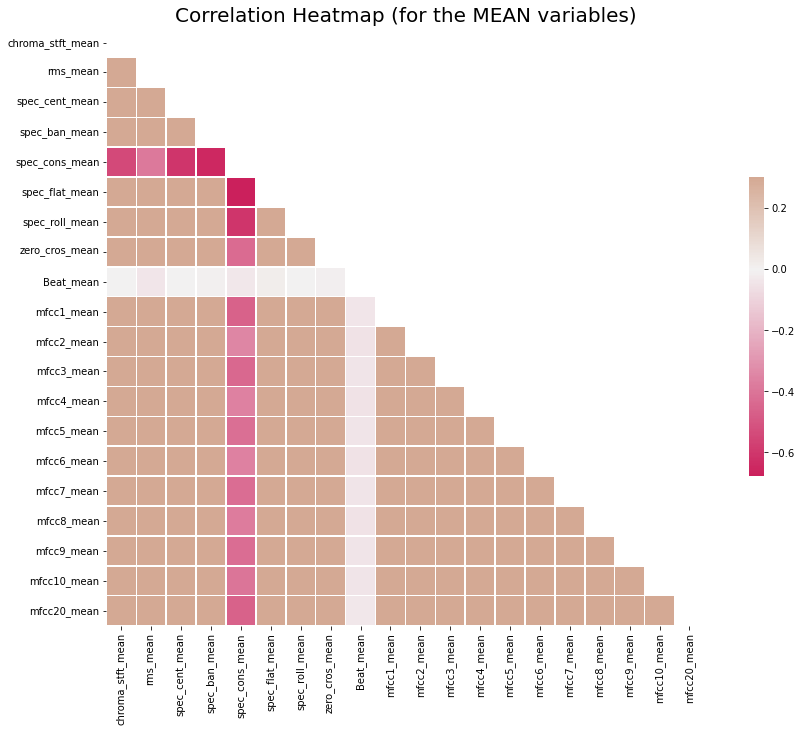

In [6]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

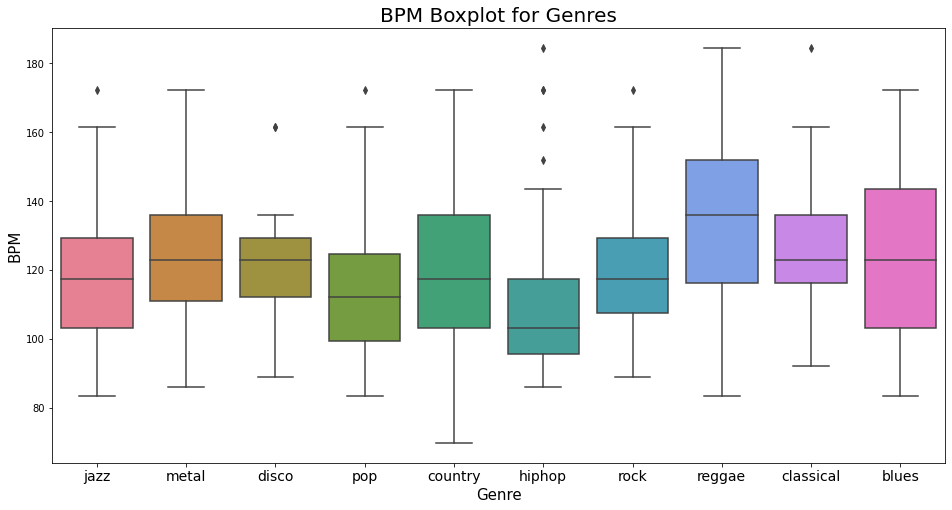

In [7]:
x = data[["label", "Tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "Tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

**Preprocessing**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df = data.copy()

In [10]:
le_label = LabelEncoder()
df['label'] = le_label.fit_transform(df['label'].astype(str))

In [11]:
df.label.value_counts()

9    100
8    100
7    100
6    100
4    100
3    100
2    100
1    100
0    100
5     99
Name: label, dtype: int64

In [12]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [13]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (999, 50)
Shape of y: (999,)


In [14]:
X

array([[ 3.44567657e-01,  8.50045383e-02,  2.91555375e-01, ...,
         9.58731445e+03, -7.56538200e+00,  4.84860938e+03],
       [ 3.28118712e-01,  8.65568370e-02,  2.94205427e-01, ...,
         1.51395781e+04, -9.78660583e+00,  7.65138281e+03],
       [ 2.67640084e-01,  8.39494765e-02,  2.89740354e-01, ...,
         1.07638477e+04, -1.17307606e+01,  5.42998633e+03],
       ...,
       [ 3.75158191e-01,  9.38634574e-02,  3.06371450e-01, ...,
         5.29185840e+03,  1.60071778e+00,  2.73083862e+03],
       [ 4.42972302e-01,  7.82904252e-02,  2.79804260e-01, ...,
         2.74750830e+03,  1.83611107e+00,  1.45823962e+03],
       [ 3.70278656e-01,  8.51674080e-02,  2.91834563e-01, ...,
         6.56261475e+03, -3.38666892e+00,  3.32503125e+03]])

In [15]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
y_train

array([3, 3, 2, 9, 0, 2, 7, 2, 0, 5, 3, 7, 2, 8, 3, 5, 8, 0, 1, 7, 7, 1,
       5, 4, 7, 0, 6, 4, 9, 5, 0, 4, 9, 6, 0, 6, 7, 1, 5, 5, 1, 5, 5, 9,
       8, 0, 2, 3, 6, 0, 5, 7, 4, 4, 8, 0, 8, 8, 0, 4, 5, 5, 6, 3, 3, 2,
       7, 9, 0, 9, 6, 5, 2, 6, 3, 1, 2, 3, 9, 3, 1, 9, 3, 4, 9, 6, 4, 8,
       8, 2, 1, 6, 3, 2, 6, 5, 0, 9, 0, 6, 3, 2, 4, 0, 5, 8, 0, 7, 5, 3,
       4, 3, 0, 9, 9, 6, 1, 4, 2, 1, 6, 7, 9, 0, 8, 5, 0, 7, 1, 8, 7, 0,
       2, 9, 1, 1, 6, 5, 8, 9, 2, 8, 1, 6, 6, 1, 7, 5, 1, 6, 7, 1, 0, 1,
       1, 3, 2, 0, 7, 0, 8, 9, 4, 2, 5, 0, 5, 3, 0, 3, 6, 1, 9, 0, 3, 4,
       1, 2, 2, 1, 1, 9, 5, 9, 4, 3, 6, 2, 3, 5, 1, 8, 0, 5, 8, 5, 7, 2,
       7, 6, 8, 8, 7, 1, 5, 6, 3, 0, 2, 5, 0, 9, 8, 6, 4, 1, 6, 9, 7, 0,
       7, 5, 6, 7, 6, 2, 3, 5, 9, 9, 5, 1, 7, 3, 1, 0, 7, 6, 6, 3, 3, 3,
       4, 9, 1, 4, 8, 6, 0, 1, 7, 5, 7, 5, 0, 9, 9, 0, 3, 3, 8, 7, 9, 7,
       5, 7, 3, 5, 7, 1, 5, 3, 7, 0, 6, 1, 3, 9, 7, 5, 0, 6, 4, 1, 1, 4,
       7, 5, 3, 9, 7, 5, 9, 6, 9, 8, 2, 3, 5, 3, 1,

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.69722059,  0.41715252,  0.4255817 , ..., -0.83989553,
         0.33653294, -0.84461499],
       [-0.15613816, -0.13545471, -0.10827067, ..., -0.62951597,
        -0.0763544 , -0.63955852],
       [-0.84683998,  0.60951941,  0.60832009, ..., -0.15974405,
        -0.33516339, -0.16831644],
       ...,
       [-0.74122272,  0.77522353,  0.7644975 , ..., -0.27120408,
         0.15722618, -0.25285223],
       [ 1.15191558,  0.82402036,  0.81027629, ..., -0.46108597,
         0.99161332, -0.46873235],
       [ 0.37101368,  0.31577904,  0.32865192, ..., -0.32470045,
         0.69309512, -0.33600072]])

Testing ML models

In [18]:
pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import catboost as cb

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [20]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [21]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# catboost
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
model_assess(cbc,"Cat Boost Classifier")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.45333 

Accuracy Stochastic Gradient Descent : 0.59667 

Accuracy KNN : 0.51667 

Accuracy Decission trees : 0.49667 

Accuracy Random Forest : 0.58667 

Accuracy Support Vector Machine : 0.57667 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Logistic Regression : 0.65333 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.65667 

Accuracy Cat Boost Classifier : 0.67667 

Accuracy Cross Gradient Booster : 0.64333 

Accuracy Cross Gradient Booster (Random Forest) : 0.57333 



Testing ANN

In [22]:
from keras.models import Sequential

In [23]:
def train_model(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy', 
                metrics='accuracy')
  return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [24]:
def plot_graph(history):
  print("Validation Accuracy", max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [25]:
model = keras.models.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    
    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])
print(model.summary())
model_history = train_model(model=model, epochs=300, optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               26112     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("Test loss:", test_loss)
print()
print("Best Accuracy:", test_acc*100)

3/3 [==============================] - 0s 5ms/step - loss: 1.6108 - accuracy: 0.6967
Test loss: 1.610835313796997

Best Accuracy: 69.66666579246521


In [27]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

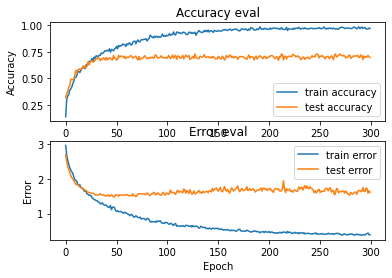

In [28]:
plot_history(model_history)

In [29]:
data_smple = data.sample()
data_smple

,filename,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rms_mean,rms_var,rms_std,spec_cent_mean,spec_cent_var,spec_cent_std,spec_ban_mean,spec_ban_var,spec_ban_std,spec_cons_mean,spec_cons_var,spec_cons_std,spec_flat_mean,spec_flat_var,spec_flat_std,spec_roll_mean,spec_roll_var,spec_roll_std,zero_cros_mean,zero_cros_var,zero_cros_std,Tempo,Beat_mean,Beat_var,Beat_std,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc20_mean,mfcc20_var,label
64,jazz.00065.wav,0.24767,0.090193,0.300322,0.082298,0.001597,0.039966,1337.948611,143301.761914,378.552192,1518.439917,32886.791561,181.347158,19.030045,29.559315,5.436848,0.001238,0.000002,0.001369,2755.391672,700911.822436,837.204767,0.076529,0.001144,0.033824,99.384014,15.18585,67.75338,8.231244,-235.681702,5291.398438,-45.444942,38981.707031,-37.835705,26268.359375,-12.732241,21635.003906,-12.052607,17368.691406,-9.705998,14525.773438,-8.368576,12489.229492,-7.070913,10960.581055,-5.667788,9766.927734,-5.07061,8804.4375,-1.34426,4474.535156,jazz


In [30]:
pred_val = data_smple.iloc[:,1:-1]
pred_val1 = sc.transform(pred_val)
pred_val1

array([[-1.62371725,  0.48564674,  0.49082732, -0.75577613, -0.3998471 ,
        -0.31398716, -1.19930216, -0.80735395, -0.94506899, -1.3700837 ,
        -1.06353322, -1.39355577, -0.6859121 , -0.70308582, -0.63754048,
        -0.68062032, -0.33281456, -0.79984187, -1.15022536, -0.80085902,
        -0.8660538 , -0.64021716, -0.60151028, -0.65219579, -1.04092785,
         0.54565993, -0.08605188, -0.04064868, -0.92757421,  0.61710176,
        -0.56979584,  0.94973473, -0.7558508 ,  0.85761933, -0.42009843,
         0.92258517, -0.52228246,  0.90142813, -0.6485668 ,  0.88335094,
        -0.58753478,  0.87858251, -0.65065352,  0.87234234, -0.50667863,
         0.86951391, -0.56788719,  0.86423753, -0.15103154,  0.85466598]])

In [31]:
preds = model.predict(pred_val1)
predic = np.argmax(preds, axis=1)
predic

array([5])

In [32]:
predic1 = int(predic)
result = le_label.inverse_transform([predic1])

In [33]:
print(result)

['jazz']


saving the artifical neural network model because it performed better.

In [34]:
model.save("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/music_model.h5")

In [42]:
import pickle

cnn_model = {}
cnn_model["label"] = le_label
cnn_model["Standard_Scalar"] = sc

with open("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/capstone.pkl", "wb") as f:
  pickle.dump(cnn_model, f)

In [ ]:
'chroma_stft_mean', 'chroma_stft_var', 'chroma_stft_std', 'rms_mean', 
                             'rms_var', 'rms_std', 'spec_cent_mean', 'spec_cent_var', 'spec_cent_std', 'spec_ban_mean', 
                             'spec_ban_var', 'spec_ban_std', 'spec_cons_mean', 'spec_cons_var', 'spec_cons_std', 'spec_flat_mean', 
                             'spec_flat_var', 'spec_flat_std', 'spec_roll_mean', 'spec_roll_var', 'spec_roll_std', 'zero_cros_mean', 
                             'zero_cros_var', 'zero_cros_std', 'Tempo', 'Beat_mean', 'Beat_var', 'Beat_std', 
                             'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 
                             'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
                             'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc20_mean', 'mfcc20_var', 'label'))


In [36]:
def preprocess(file):
  y, sr = librosa.load(file, duration=30)

  #data0 = []
  #defining the Chroma features in the dataframe
  chroma = librosa.feature.chroma_stft(y=y, sr=sr)
  chroma_stft_mean = chroma.mean()#chroma_stft_mean
  chroma_stft_var = chroma.var()#chroma_stft_var
  chroma_stft_std = chroma.std()#chroma_stft_std

  #defining the rms features in the dataframe
  rms = librosa.feature.rms(y=y)
  rms_mean = rms.mean()#rms_mean
  rms_var = rms.var()#rms_var
  rms_std = rms.std()#rms_std

  #defining the spectral centroid features in the dataframe
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  spec_cent_mean = cent.mean()#spec_cent_mean
  spec_cent_var = cent.var()#spec_cent_var
  spec_cent_std = cent.std()#spec_cent_std

  #defining the spectral bandwidth features in the dataframe
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spec_ban_mean = spec_bw.mean()#spec_ban_mean
  spec_ban_var = spec_bw.var()#spec_ban_var
  spec_ban_std = spec_bw.std()#spec_ban_std

  #defining the spectral constract features in the dataframe
  S = np.abs(librosa.stft(y))
  contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
  spec_cons_mean = contrast.mean()#spec_cons_mean
  spec_cons_var = contrast.var()#spec_cons_var
  spec_cons_std = contrast.std()#spec_cons_std

  #defining the spectral flatness features in the dataframe
  flatness = librosa.feature.spectral_flatness(y=y)
  spec_flat_mean = flatness.mean()#spec_flat_mean
  spec_flat_var = flatness.var()#spec_flat_var
  spec_flat_std = flatness.std()#spec_flat_std

  #defining the mel frequency cepstrum coefficient features in the dataframe
  mfcc1 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=1)#n_mfcc=1
  mfcc1_mean = mfcc1.mean()#mfcc1_mean
  mfcc1_var = mfcc1.var()#mfcc1_var

  mfcc2 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=2)#n_mfcc=2
  mfcc2_mean = mfcc2.mean()#mfcc2_mean
  mfcc2_var = mfcc2.var()#mfcc2_var

  mfcc3 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=3)#n_mfcc=3
  mfcc3_mean = mfcc3.mean()#mfcc3_mean
  mfcc3_var = mfcc3.var()#mfcc3_var

  mfcc4 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=4)#n_mfcc=4
  mfcc4_mean = mfcc4.mean()#mfcc4_mean
  mfcc4_var = mfcc4.var()#mfcc4_var

  mfcc5 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)#n_mfcc=5
  mfcc5_mean = mfcc5.mean()#mfcc5_mean
  mfcc5_var = mfcc5.var()#mfcc5_var

  mfcc6 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=6)#n_mfcc=6
  mfcc6_mean = mfcc6.mean()#mfcc6_mean
  mfcc6_var = mfcc6.var()#mfcc6_var

  mfcc7 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=7)#n_mfcc=7
  mfcc7_mean = mfcc7.mean()#mfcc7_mean
  mfcc7_var = mfcc7.var()#mfcc7_var

  mfcc8 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)#n_mfcc=8
  mfcc8_mean = mfcc8.mean()#mfcc8_mean
  mfcc8_var = mfcc8.var()#mfcc8_var

  mfcc9 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=9)#n_mfcc=9
  mfcc9_mean = mfcc9.mean()#mfcc9_mean
  mfcc9_var = mfcc9.var()#mfcc9_var

  mfcc10 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)#n_mfcc=10
  mfcc10_mean = mfcc10.mean()#mfcc10_mean
  mfcc10_var = mfcc10.var()#mfcc10_var

  mfcc20 = librosa.feature.mfcc(y=y, sr=sr)#n_mfcc=20
  mfcc20_mean = mfcc20.mean()#mfcc20_mean
  mfcc20_var = mfcc20.var()#mfcc20_var

  #defining the spectral roll-off features in the dataframe
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  spec_roll_mean = rolloff.mean()#spec_roll_mean
  spec_roll_var = rolloff.var()#spec_roll_var
  spec_roll_std = rolloff.std()#spec_roll_std

  #defining the zero crossing rate features in the dataframe
  zero_crosing_rate = librosa.feature.zero_crossing_rate(y)
  zero_cros_mean = zero_crosing_rate.mean()#zero_cros_mean
  zero_cros_var = zero_crosing_rate.var()#zero_cros_var
  zero_cros_std = zero_crosing_rate.std()#zero_cros_std

  #defining the Tempo feature in the dataframe
  onset_env = librosa.onset.onset_strength(y, sr=sr)
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
  Tempo = tempo.mean()#Tempo

  #defining the Beat feature in the dataframe
  tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
  beat = librosa.frames_to_time(beats, sr=sr)#changing the beats to timestamps
  Beat_mean = beat.mean()#Beat_var
  Beat_var = beat.var()#Beat_var
  Beat_std = beat.std()#Beat_std
      
  data0 = [[chroma_stft_mean, chroma_stft_var, chroma_stft_std, rms_mean, rms_var, rms_std, spec_cent_mean, spec_cent_var, spec_cent_std, 
                 spec_ban_mean, spec_ban_var, spec_ban_std, spec_cons_mean, spec_cons_var, spec_cons_std, 
                 spec_flat_mean, spec_flat_var, spec_flat_std, spec_roll_mean, spec_roll_var, spec_roll_std, 
                 zero_cros_mean, zero_cros_var, zero_cros_std, Tempo, Beat_mean, Beat_var, Beat_std, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, 
                 mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var, mfcc6_mean, mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var, 
                 mfcc9_mean, mfcc9_var, mfcc10_mean, mfcc10_var, mfcc20_mean, mfcc20_var]]
  #
  return data0

In [48]:
def predict(data0, sc, model, le_label):
  data0 = sc.transform(data0)
  prediction = model.predict(data0)
  pred = np.argmax(prediction, axis=1)
  pred = int(pred)
  result = le_label.inverse_transform([pred])
  print(result)

In [40]:
# It can be used to reconstruct the model identically.
l_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/music_model.h5")

In [43]:
# load the model
with open("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/capstone.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [44]:
lle_label = loaded_model["label"]  # label encoder
Standard_Scalar = loaded_model["Standard_Scalar"]  # Standard scalar

In [45]:
data_new = preprocess("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/high-stakes-783.mp3")
data_new

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[0.35614195,
  0.08735995,
  0.29556715,
  0.097778104,
  0.0009737928,
  0.031205654,
  855.9301520742065,
  158990.479978096,
  398.7361031786512,
  1320.0263787988729,
  268555.221716365,
  518.2231389241174,
  23.863709373088952,
  51.5151822680632,
  7.17740776799418,
  0.0058899075,
  0.0050430824,
  0.071014665,
  1696.2980760509386,
  812990.9947546337,
  901.6601326190671,
  0.03427870428599071,
  0.0006008618516392457,
  0.024512483587740466,
  129.19921875,
  14.547111259804469,
  68.22706842929456,
  8.259967822533849,
  -249.59636,
  7014.777,
  -44.03988,
  46300.965,
  -27.160301,
  31653.568,
  -10.211709,
  24630.004,
  -4.1178093,
  19890.895,
  -1.3867621,
  16636.748,
  -1.0738683,
  14271.386,
  1.3048022,
  12535.481,
  2.490154,
  11161.774,
  2.7076335,
  10049.739,
  0.30176118,
  5062.3623]]

In [47]:
data_new = np.array(data_new)
data_new.shape

(1, 50)

In [50]:
predict(data_new, Standard_Scalar, l_model, lle_label)

['country']


In [51]:
data_2 = preprocess("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/rubinstein-melody-in-f-remix-harmonica-7403.mp3")
data_2

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[0.3669599,
  0.10026617,
  0.31664833,
  0.06809778,
  0.0007541937,
  0.027462587,
  2022.1700971068944,
  855194.4732607439,
  924.7672535620754,
  2534.083362765534,
  448710.78627349634,
  669.8587808437659,
  22.273884197839383,
  54.094847184092096,
  7.354919930501765,
  0.0056209317,
  8.476599e-05,
  0.0092068445,
  4760.254548725329,
  5320693.624737049,
  2306.6628762645505,
  0.05198419057178793,
  0.0011757522342093732,
  0.034289243710081636,
  135.99917763157896,
  15.369706702353074,
  63.43451067377847,
  7.964578499442294,
  -249.24045,
  14112.889,
  -76.00119,
  38039.41,
  -42.53193,
  27710.848,
  -27.63944,
  21482.822,
  -20.073715,
  17436.834,
  -13.483799,
  14766.094,
  -11.3920765,
  12692.462,
  -9.454071,
  11138.286,
  -9.67847,
  9913.602,
  -7.8651934,
  8959.772,
  -3.631827,
  4535.9053]]

In [52]:
data_2 = np.array(data_2)
data_2.shape

(1, 50)

In [53]:
predict(data_2, Standard_Scalar, l_model, lle_label)

['reggae']
